데이터 표현과 특성 공학

In [1]:
# https://raw.githubusercontent.com/bigdataleeky/data/main/adult.data
# https://raw.githubusercontent.com/bigdataleeky/data/main/citibike.csv
# https://raw.githubusercontent.com/bigdataleeky/data/main/ram_price.csv
# https://raw.githubusercontent.com/bigdataleeky/data/main/ratings_test.txt
# https://raw.githubusercontent.com/bigdataleeky/data/main/ratings_train.txt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv( 'https://raw.githubusercontent.com/bigdataleeky/data/main/adult.data', names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data = df[['age', 'workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
# 문자열로 배열 된 범주형 데이터 확인
# gender의 범주형 데이터의 종류와 개수
data.gender.value_counts()

gender
 Male      21790
 Female    10771
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [7]:
print(f"original feature : {data.columns}")
data_dummies = pd.get_dummies(data)
# 범주형  데이터들이 많아서 전부 원핫으
print(f'one hot : {data_dummies.columns}')

original feature : Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')
one hot : Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-manag

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [9]:
# numpy배열형태로
X = data_dummies.iloc[:, :-2].to_numpy()
y = data_dummies.iloc[:, -1].to_numpy()

In [10]:
X.shape, y.shape

((32561, 44), (32561,))

In [11]:
# 분류 모델
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)

# 모델 적용(fit), 점수 확인(score)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# 원핫으로 바뀌지 않은 수치형 데이터가 있기 때문에 스케일링
# 원래는 수치형만 따로 스케일링 해주어야함
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

lr.fit(X_train,y_train)
lr.score(X_train,y_train), lr.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8113431613431613, 0.8081316791548949)

In [12]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [13]:
from tqdm import tqdm
model = Sequential([
    Dense(10,activation='relu',input_shape = (44, ) ),
    Dense(2,activation='softmax' ),
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=10)
model.evaluate(X_train_scaled,y_train), model.evaluate(X_test_scaled,y_test)

Epoch 1/10
611/611 [==============================] - 3s 4ms/step - loss: 0.4543 - accuracy: 0.7840 - val_loss: 0.4366 - val_accuracy: 0.8022
Epoch 2/10
611/611 [==============================] - 2s 3ms/step - loss: 0.4102 - accuracy: 0.8118 - val_loss: 0.4285 - val_accuracy: 0.8114
Epoch 3/10
611/611 [==============================] - 2s 3ms/step - loss: 0.4041 - accuracy: 0.8179 - val_loss: 0.4232 - val_accuracy: 0.8147
Epoch 4/10
611/611 [==============================] - 2s 3ms/step - loss: 0.3998 - accuracy: 0.8193 - val_loss: 0.4224 - val_accuracy: 0.8114
Epoch 5/10
611/611 [==============================] - 2s 3ms/step - loss: 0.3976 - accuracy: 0.8195 - val_loss: 0.4205 - val_accuracy: 0.8131
Epoch 6/10
611/611 [==============================] - 2s 2ms/step - loss: 0.3959 - accuracy: 0.8209 - val_loss: 0.4172 - val_accuracy: 0.8159
Epoch 7/10
611/611 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8213 - val_loss: 0.4168 - val_accuracy: 0.8135
Epoch 

([0.3932531476020813, 0.8208845257759094],
 [0.3955574929714203, 0.8152561187744141])

숫자로 표현되는 범주형 특성

In [14]:
demo = pd.DataFrame(
    {
        '숫자특성':[0,1,2,1],
        '범주형특성':['양말','신발','양말','상자']
    }
)
demo

,숫자특성,범주형특성
0,0,양말
1,1,신발
2,2,양말
3,1,상자


In [15]:
# 원 핫 적용
pd.get_dummies(demo)

,숫자특성,범주형특성_상자,범주형특성_신발,범주형특성_양말
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [16]:
# 타입 변경
demo['숫자특성'] = demo['숫자특성'].astype(str)
pd.get_dummies(demo)

,숫자특성_0,숫자특성_1,숫자특성_2,범주형특성_상자,범주형특성_신발,범주형특성_양말
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


In [17]:
# 학습용 데이터 생성
import numpy as np

def wave(n_samples=100):
  rnd = np.random.RandomState(42)     # 시드값 고정
  x = rnd.uniform(-3,3,size=n_samples)
  y = np.sign(4 * x) + x
  y = (y + rnd.normal(size=len(x)))/2
  return x.reshape(-1,1),y

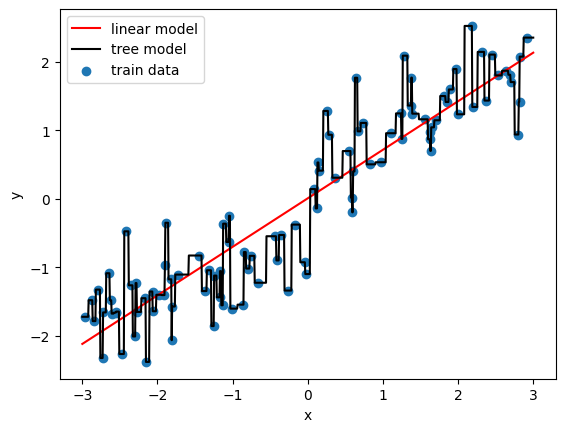

In [54]:
# 선형모델, 트리모델  regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X , y = wave()

line = np.linspace(-3,3,1000).reshape(-1,1)

# 선형모델이 예측하는 그래프
lr = LinearRegression()
lr.fit(X,y)
lr_y = lr.predict(line)
plt.plot(line,lr_y,label='linear model',c='red')

# 트리모델이 예측하는 그래프
tree = DecisionTreeRegressor()
tree.fit(X,y)
tree_y  = tree.predict(line)
plt.plot(line,tree_y,label='tree model',c='black')


plt.scatter(X[:,0],y , label = 'train data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [19]:
# linspace
np.linspace(-3,3,11)

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [20]:
rnd = np.random.RandomState(42)  # 시드값 고정
rnd.uniform(-3,3,size=11)

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303])

In [21]:
bins = np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [22]:
# X는 -3, -3 사이의 균등한 분포를 갖는 100개의 데이터 그 데이터를  [-3. , -2.4, -1.8, -1.2]

In [23]:
which_bin = np.digitize(X,bins=bins)

In [24]:
which_bin[:5],X[:5]

(array([[ 4],
        [10],
        [ 8],
        [ 6],
        [ 2]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]))

In [25]:
# 사이킷 런에도 원핫 인코더가 있음
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories = 'auto',sparse_output=False)
encoder = ohe.fit_transform(which_bin)
print(encoder[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
encoder[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [27]:
encoder.shape

(100, 10)

모델 평가 , 성능 향상

In [28]:
# 클러스터링을 위한 가상의 데이터 셋 - 사이킷 런 제공
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
# sample data
X,y = make_blobs(random_state=42)
X[:5], y[:5]

(array([[-7.72642091, -8.39495682],
        [ 5.45339605,  0.74230537],
        [-2.97867201,  9.55684617],
        [ 6.04267315,  0.57131862],
        [-6.52183983, -6.31932507]]),
 array([2, 1, 0, 1, 2]))

In [30]:
# LogisticRegression
lr = LogisticRegression()
# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)
# 학습
lr.fit(X_train,y_train)
# 평가(train,test)
lr.score(X_train,y_train),lr.score(X_test,y_test)

(1.0, 1.0)

교차 검증

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [32]:
iris = load_iris()
lr = LogisticRegression()

In [33]:
scores = cross_val_score(lr,  StandardScaler().fit_transform( iris.data ),  iris.target ,    cv=5)
scores, scores.mean()

(array([0.96666667, 1.        , 0.93333333, 0.9       , 1.        ]),
 0.9600000000000002)

In [34]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(10,shuffle=True,random_state=42)
scores = cross_val_score(lr,  StandardScaler().fit_transform( iris.data ),  iris.target ,    cv=sk)
scores, scores.mean()

(array([1.        , 1.        , 1.        , 0.93333333, 0.86666667,
        0.93333333, 1.        , 1.        , 0.93333333, 0.86666667]),
 0.9533333333333334)

LeaveOneOut: 훈련과 평가가 반복되는
- 극한으로 여러번 검증
- 데이터 포인트 선택, 나머지로 훈련하고 선택한 포인트 에이터로 검증
- 데이터 개수가 적을때

In [36]:
iris.data.shape

(150, 4)

In [37]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(lr, StandardScaler().fit_transform( iris.data ), iris.target, cv= loo)
scores, scores.mean()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 0.9533333333333334)

랜덤 분할 교차 검증
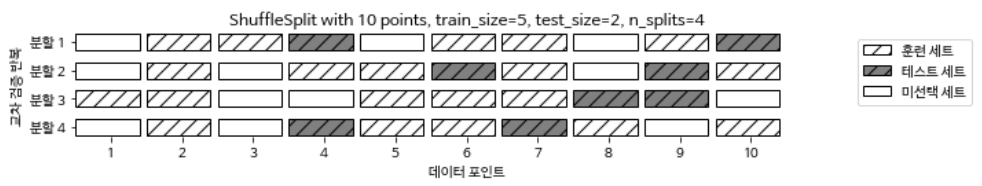


In [38]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(10,test_size=5,train_size=5)
scores = cross_val_score(lr, StandardScaler().fit_transform( iris.data ), iris.target, cv= ss)
scores, scores.mean()

(array([0.6, 0.6, 0.8, 0.6, 0.8, 0.8, 0.8, 0.8, 0.6, 0.4]), 0.6799999999999999)

SVC : Support Vector Machine
  - 분류문제, 선형 및 비선형에도 잘 적용
  - 간단하게 분류 문제 테스트할 때 파일럿 모델 많이 사용

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(SVC() , param_grid = param_grid, cv=5, return_train_score=True)

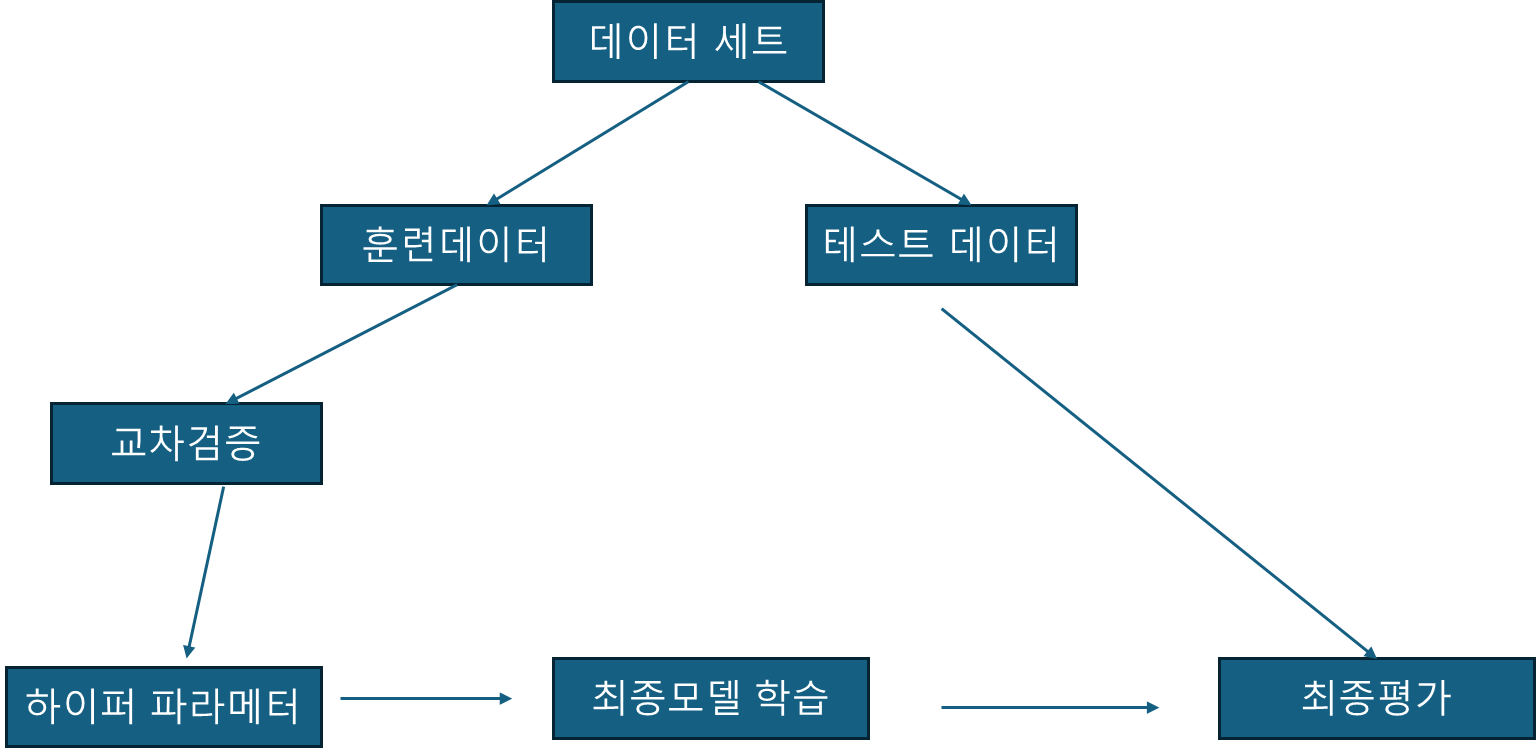

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data;   y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [41]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [42]:
grid_search.best_params_,  grid_search.best_score_

({'C': 10, 'gamma': 0.1}, 0.9727272727272727)

In [43]:
best_svc = grid_search.best_estimator_
best_svc.score(X_test,  y_test)

0.9473684210526315

교차 검증 결과 분석

In [44]:
import pandas as pd
pd.options.display.max_columns = None
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.001716,0.001188,0.002847,0.002292,0.001589,0.001498,0.001552,0.001256,0.001262,0.001264,0.001326,0.001423,0.00117,0.001562,0.001087,0.001091,0.001778,0.002308,0.002275,0.001881,0.001544,0.001757,0.002574,0.002628,0.001815,0.001736,0.00163,0.001757,0.002307,0.003549,0.001549,0.001457,0.002167,0.001576,0.002298,0.002383
std_fit_time,0.00093,0.000025,0.002737,0.000202,0.000285,0.000127,0.000317,0.000059,0.000114,0.000063,0.000191,0.000271,0.000019,0.000412,0.000011,0.000018,0.000489,0.000287,0.000231,0.00007,0.000061,0.000034,0.000472,0.000163,0.000159,0.000594,0.000122,0.000034,0.000095,0.001515,0.00008,0.000299,0.00169,0.000118,0.000178,0.000109
mean_score_time,0.000794,0.00069,0.000938,0.001648,0.000844,0.001032,0.00074,0.000705,0.000762,0.000744,0.000736,0.000691,0.000674,0.000824,0.000643,0.000664,0.001091,0.00122,0.001297,0.001448,0.001473,0.001103,0.002312,0.001314,0.001196,0.000965,0.001163,0.001165,0.001515,0.001713,0.001099,0.000993,0.000927,0.001064,0.001062,0.001185
std_score_time,0.000243,0.000039,0.00029,0.000553,0.000201,0.000386,0.000027,0.000041,0.000176,0.000099,0.000056,0.000049,0.000031,0.000163,0.000009,0.000026,0.000379,0.000071,0.000124,0.000479,0.000988,0.000027,0.001917,0.000031,0.000142,0.000033,0.000151,0.000012,0.00064,0.000663,0.000053,0.000222,0.000063,0.000215,0.000073,0.000053
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 0.1, 'gamma': 0.001}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1}","{'C': 0.1, 'gamma': 10}","{'C': 0.1, 'gamma': 100}","{'C': 1, 'gamma': 0.001}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 0.1}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 10}","{'C': 1, 'gamma': 100}","{'C': 10, 'gamma': 0.001}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.652174,0.652174,0.652174,0.652174,0.478261,0.391304,0.652174,0.652174,0.652174,0.652174,0.478261,0.391304,0.652174,0.652174,0.913043,0.956522,0.478261,0.391304,0.652174,0.913043,0.956522,1.0,0.869565,0.391304,0.913043,0.956522,1.0,0.913043,0.869565,0.391304,0.956522,1.0,0.956522,0.913043,0.869565,0.391304
split1_test_score,0.652174,0.652174,0.652174,0.652174,0.565217,0.478261,0.652174,0.652174,0.652174,0.652174,0.565217,0.478261,0.652174,0.652174,0.869565,1.0,0.565217,0.478261,0.652174,0.913043,1.0,1.0,0.956522,0.608696,0.913043,1.0,1.0,0.956522,0.956522,0.608696,1.0,1.0,0.956522,0.956522,0.956522,0.608696
split2_test_score,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.318182,0.636364,0.954545,0.909091,0.318182,0.318182,0.636364,0.909091,0.909091,0.909091,0.909091,0.681818,0.954545,0.909091,0.909091,0.909091,0.909091,0.681818,0.909091,0.909091,0.863636,0.909091,0.909091,0.681818


교차검증 평균 점수 히트

In [45]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

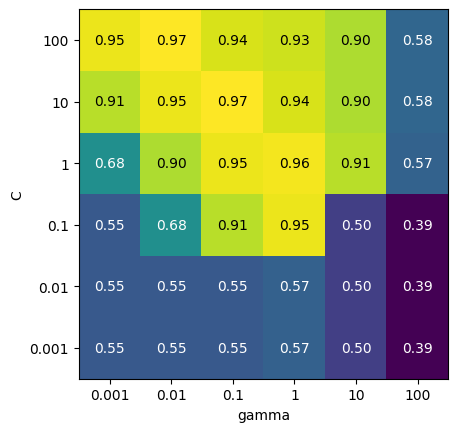

In [46]:
scores = np.array(results.mean_test_score).reshape(6,6)
heatmap(scores,xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'])
plt.show()

에러의 종류
- confusion metrix

In [47]:
from string import digits
from sklearn.datasets import load_digits
digit = load_digits()
X = digit.data
y = digit.target

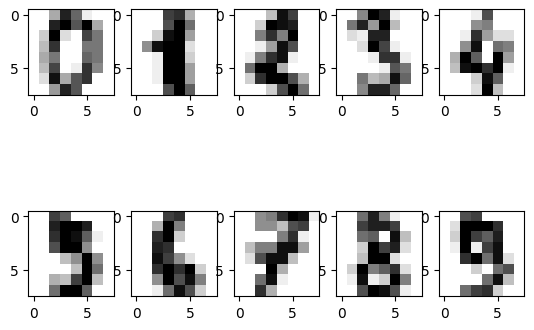

In [48]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X[i].reshape(8,8),cmap='gray_r')
plt.show()

In [49]:
# 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, random_state=42)

# tree 모델 적용, 로지스틱
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train), tree.score(X_test,y_test))

# 평가
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train_scaled,y_train), lr.score(X_test_scaled,y_test))

0.502144125360926 0.35647404070812416
0.9784706755753526 0.9266666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# 오차행렬(Confution matrics)
from sklearn.metrics import confusion_matrix

# 정답 클래스 중 9는 0 아니면 1
pred_nine = lr.predict(X_test_scaled)
confusion_matrix(y_test,pred_nine)

array([[42,  0,  1,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  2, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0, 43,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 42,  0,  0],
       [ 0,  6,  1,  1,  0,  1,  2,  1, 29,  2],
       [ 0,  0,  0,  0,  1,  0,  0,  2,  0, 42]])

In [51]:
#                    predict negative            predict positive
#actual negative          TN                          FP
#actual positive          FN                           TP

#TN(True Negative) :
#FN(False Negative) : 음성 데이터를 양성으로 잘못 예측한 경우(TypeI 오류 중 제 1종 오류)
#TP(True positive) : 양성인 데이터를 음성으로 잘못 예측한 경우(TypeII 오류 중 제 2종 오류)
#FP(False positive) :

In [52]:
# 정확도 : accuracy = (tp + tn) / (tn + fp + fn + tp)
    # 100명의 환자 중에서 90명의 암환자를 진단 90%
# 정밀도 : tp / (fp + tp)   양성으로 예측한 데이터 중에서 양성을 맞춘 비율
    # 100명중에서 예측한 암환자가 30명인데 실제 25명 25/(fp+tp)
# 재현율 = tp / (fn + tp)   실제 양성인 데이터들 중에거 양성을 맞춘 비율
    # 100명의 실제 암환자 중 80명을 맞췄다면 80 / 100
# F1-score : 정밀도 * 재현율 / (정밀도 + 재현율)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score